# Modal analysis
For the modal analysis we use the modals from the provided modals.csv file.
To begin, we compare the total number of modals in the essays (see Figure: Number of modals per essay). The essays are lemmatized before extracting the modal verbs to include, for example, forms of to be. When comparing the number of modals per essay, we cannot observe any difference between the student and ChatGPT essays. We then compare the number of individual modals per essay, with the largest difference being between 0.7 per essay (see Figure: Number of individual modals per essay).


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
import config
import spacy

path = config.system_path
plt.rcParams["figure.figsize"] = (config.fig_x, config.fig_y)

nlp = spacy.load("en_core_web_sm")

essays = pd.read_csv(path + "raw_data.csv", sep=";", encoding="UTF-8")
modals = pd.read_csv(path + "data\\modals.csv", sep=",", encoding="UTF-8", header=None)

# Lemmatized the column of the identifier
def lemmatize (identifier):
    temp = essays[identifier].apply(lambda x: nlp(x))
    essays[identifier] =temp.apply(lambda x: " ".join([y.lemma_ for y in x]))

modals[0] = modals[0].apply(lambda x: x.replace('_', ' '))
lemmatize("Student Essay")
lemmatize("ChatGPT Essay 0.2")
lemmatize("ChatGPT Essay 0.9")

# Counts the total number of modals per essay
def count_total_modals(text):
    counter = 0
    for modal in modals.itertuples():
        if modal[1] in text:
            counter += text.count(modal[1])
    return counter

def plot_smooth(x, y, label, color):
    X_Y_Spline = make_interp_spline(x, y)
    X_ = np.linspace(x.min(), x.max(), 500)
    Y_ = X_Y_Spline(X_)
    plt.plot(X_, Y_, label = label, color = color)

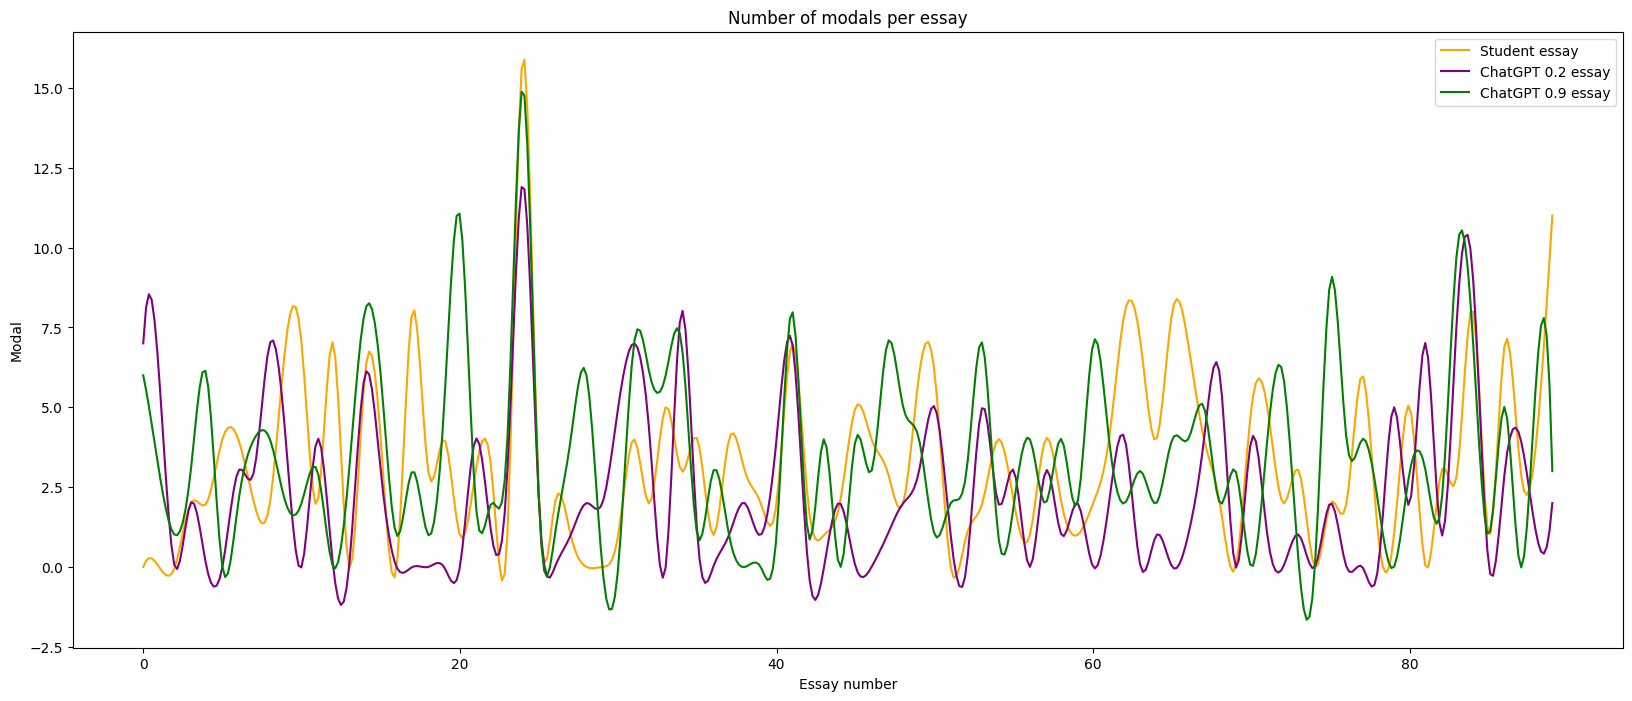

In [19]:
plot_smooth(essays["Unnamed: 0"], essays["Student Essay"].apply(lambda x: count_total_modals(x)), "Student essay", "orange")
plot_smooth(essays["Unnamed: 0"], essays["ChatGPT Essay 0.2"].apply(lambda x: count_total_modals(x)), "ChatGPT 0.2 essay", "purple")
plot_smooth(essays["Unnamed: 0"], essays["ChatGPT Essay 0.9"].apply(lambda x: count_total_modals(x)), "ChatGPT 0.9 essay", "green")
plt.xlabel("Essay number")
plt.ylabel("Modal")
plt.title("Number of modals per essay")
plt.legend()
plt.show()

In [20]:
all_modals = []
for marker in modals.itertuples():
    if not any(marker[2] in modal for modal in all_modals):
        all_modals.append(marker[2])

# Identifies the number of of individual modals
def identify_discourse_markers(text):
    temp = []
    for modal in modals.itertuples():
        if modal[1] in text:
            temp.append(modal[2])
    result = []
    for i in range(len(all_modals)):
        result.append(temp.count(all_modals[i]))
    return result

# Calcualtes the sum of lists in lists: [1,4]+[1,3] = [2,7]
def calculate_sum(label):
    extracted_essays = essays[label].apply(lambda x: identify_discourse_markers(x))
    res = list()
    for j in range(0, len(extracted_essays[0])):
        tmp = 0
        for i in range(0, len(extracted_essays)):
            tmp = tmp + extracted_essays[i][j]
        res.append(tmp)
    for x in range(0, len(res)):
        res[x] = np.divide(res[x],len(extracted_essays))
    return res    

# Plotting the modal graph
def plot_discourse(x, y, label, color):
    y_ = []
    for i in range(len(y)):
        y_.append(y[i].replace('_', ' '))
    plt.scatter(x, y_, label = label, color = color, alpha=0.5)

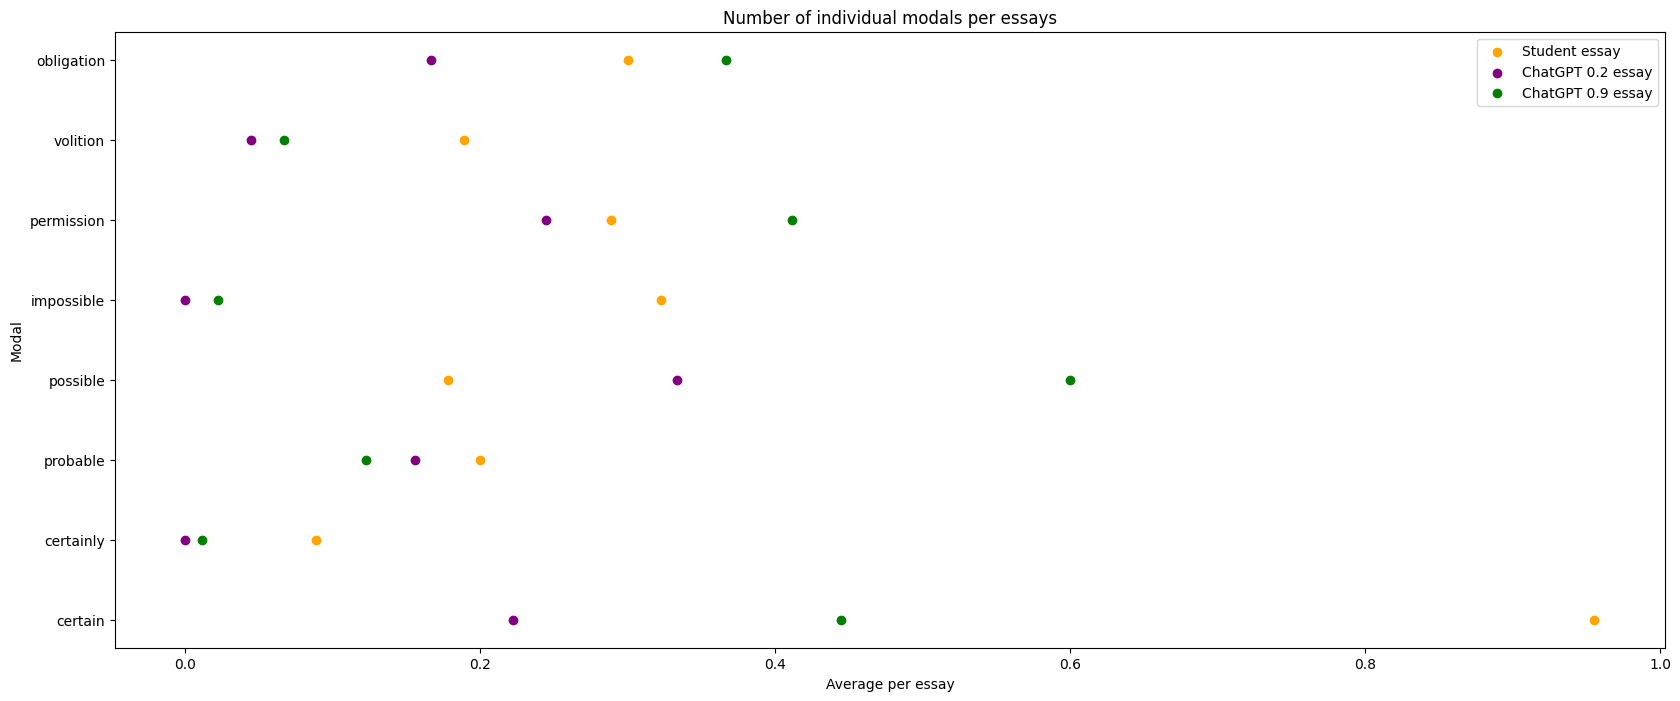

In [21]:
plt.scatter(x = calculate_sum("Student Essay"), y = all_modals, label = "Student essay", color = "orange")
plt.scatter(x = calculate_sum("ChatGPT Essay 0.2"), y = all_modals, label = "ChatGPT 0.2 essay", color = "purple")
plt.scatter(x = calculate_sum("ChatGPT Essay 0.9"), y = all_modals, label = "ChatGPT 0.9 essay", color = "green")
plt.xlabel("Average per essay")
plt.ylabel("Modal")
plt.title("Number of individual modals per essays")
plt.legend()
plt.show()